In [1]:
import pandas
import pandas as pd
import numpy
import numpy as np
import os
np.set_printoptions(linewidth=200)

In [2]:
os.getcwd()

'F:\\Dropbox\\EM Lyon\\5A2F14_Advanced_Statistics\\Multiple_Correspondance_Analysis\\notebooks'

In [3]:
# change working directory
os.chdir('../data')
os.getcwd()

'F:\\Dropbox\\EM Lyon\\5A2F14_Advanced_Statistics\\Multiple_Correspondance_Analysis\\data'

In [4]:
# load data - index_col = 0 means columns n°0 is a label
D = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="ACM_CANINES",index_col=0)

# print data
print(D.info())

# select only active variables
DActives = D[['Taille','Velocite','Affection']]
display(DActives)

# define the number of (active) variables
p = DActives.shape[1]

# define the number of observations
n = DActives.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Beauceron to Labrador
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Taille     8 non-null      object 
 1   Velocite   8 non-null      object 
 2   Affection  8 non-null      object 
 3   Cote       8 non-null      float64
 4   Fonction   8 non-null      object 
dtypes: float64(1), object(4)
memory usage: 384.0+ bytes
None


,Taille,Velocite,Affection
Chien,,,
Beauceron,Taille++,Veloc++,Affec+
Basset,Taill-,Velo-,Affe-
Berger All,Taille++,Veloc++,Affec+
Boxer,Taille+,Veloc+,Affec+
Bull-Dog,Taill-,Velo-,Affec+
Bull-Mastif,Taille++,Velo-,Affe-
Caniche,Taill-,Veloc+,Affec+
Labrador,Taille+,Veloc+,Affec+


In [5]:
# dummy coding (one hot encoding)
X = pandas.get_dummies(DActives,prefix='',prefix_sep='')
print(X)

             Taill-  Taille+  Taille++  Velo-  Veloc+  Veloc++  Affe-  Affec+
Chien                                                                        
Beauceron         0        0         1      0       0        1      0       1
Basset            1        0         0      1       0        0      1       0
Berger All        0        0         1      0       0        1      0       1
Boxer             0        1         0      0       1        0      0       1
Bull-Dog          1        0         0      1       0        0      0       1
Bull-Mastif       0        0         1      1       0        0      1       0
Caniche           1        0         0      0       1        0      0       1
Labrador          0        1         0      0       1        0      0       1


In [6]:
# average individuals profile (centroid)
ind_moy = numpy.sum(X.values,axis=0)/(n*p)
print(ind_moy)

[0.125      0.08333333 0.125      0.125      0.125      0.08333333
 0.08333333 0.25      ]


In [7]:
# Chi² distance between beauceron (n°0) and basset (n°1)
print(numpy.sum(1/ind_moy*(X.values[0,:]/p-X.values[1,:]/p)**2))

# Chi² square distance between basset(n°1) and caniche(n°6)
print(numpy.sum(1/ind_moy*(X.values[1,:]/p-X.values[6,:]/p)**2))

5.777777777777777
3.5555555555555554


In [8]:
# distance from origin (centroid) of basset (n°1)
print(numpy.sum(1/ind_moy*(X.values[1,:]/p-ind_moy)**2))

# distance from origin (centroid) of caniche (n°6)
print(numpy.sum(1/ind_moy*(X.values[6,:]/p-ind_moy)**2))

2.1111111111111107
1.2222222222222219


In [9]:
# individuals distance from origin
disto_ind = numpy.apply_along_axis(arr=X.values,axis=1,func1d=lambda x:numpy.sum(1/ind_moy*(x/p-ind_moy)**2))

# weights of the observations
poids_ind = numpy.ones(X.shape[0])/n

# inertia
inertie_ind = poids_ind*disto_ind

# print
print(pandas.DataFrame(numpy.transpose([poids_ind,disto_ind,inertie_ind]),index=D.index, columns=['weight','distance','inertia']))

             weight  distance   inertia
Chien                                  
Beauceron     0.125  1.666667  0.208333
Basset        0.125  2.111111  0.263889
Berger All    0.125  1.666667  0.208333
Boxer         0.125  1.666667  0.208333
Bull-Dog      0.125  1.222222  0.152778
Bull-Mastif   0.125  2.111111  0.263889
Caniche       0.125  1.222222  0.152778
Labrador      0.125  1.666667  0.208333


In [10]:
# total inertia
inertie_tot_ind = numpy.sum(inertie_ind)
print(f"Total inertia (individuals) : {inertie_tot_ind}")

Total inertia (individuals) : 1.6666666666666665


In [11]:
# MCA with fanalysis
from fanalysis.mca import MCA

# instanciation
acm = MCA(row_labels=DActives.index,var_labels=DActives.columns)
acm.fit(DActives.values)

# examine attributes and methods
dir(acm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_binarization',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'c_',
 'col_contrib_',
 'col_coord_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_labels_short_temp_',
 'col_labels_temp_',
 'col_topandas',
 'eig_',
 'fit',
 'fit_transform',
 'get_params',
 'mapping',
 'mapping_col',
 'mapping_row',
 'model_',
 'n_',
 'n_categories_',
 'n_components',
 'n_components_',
 'n_vars_',
 'plot_col_contrib'

In [12]:
# eigenvalues
print(acm.eig_[0])

[0.70803126 0.59148936 0.26199182 0.06974652 0.03540771]


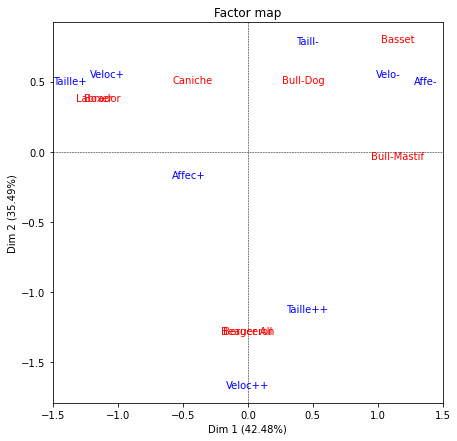

In [15]:
# plot in the first factor plane
acm.mapping(num_x_axis=1,num_y_axis=2, figsize=(7,7))

In [18]:
# coordinates on the first factor
print(pandas.DataFrame(acm.row_coord_[:,0],index=DActives.index, columns=['F1']))

                       F1
Chien                    
Beauceron    2.378066e-15
Basset       1.150779e+00
Berger All   2.510181e-15
Boxer       -1.150779e+00
Bull-Dog     4.284137e-01
Bull-Mastif  1.150779e+00
Caniche     -4.284137e-01
Labrador    -1.150779e+00


In [19]:
# inertia of the first factor
lambda_1_ind = numpy.mean(acm.row_coord_[:,0]**2)
print(f"inertia of the first factor: {lambda_1_ind}")

inertia of the first factor: 0.7080312581410025


In [20]:
# proportion of variance explained by the first factor
print(f"proportion of variance explained by the first factor : {lambda_1_ind/inertie_tot_ind}")

proportion of variance explained by the first factor : 0.4248187548846016


In [21]:
# somme en colonne (n_k)
somme_col = numpy.sum(X.values,axis=0)
print(somme_col)

[3 2 3 3 3 2 2 6]


In [22]:
# distance between taille- (2) and velocite- (5)
print(numpy.sum(n*((X.values[:,2]/somme_col[2]-X.values[:,5]/somme_col[5])**2)))

# distance between taille- (2) and velocite+ (3)
print(numpy.sum(n*((X.values[:,2]/somme_col[2]-X.values[:,3]/somme_col[3])**2)))

1.3333333333333335
3.5555555555555554


In [23]:
# average profiles (centroid) of the variables modalities (p/np)
moda_moy = numpy.ones(X.shape[0])/n

# distance to the origin of taille-
print(numpy.sum(n*((X.values[:,0]/somme_col[0]-moda_moy)**2)))

#distance to the origin of taille+
print(numpy.sum(n*((X.values[:,1]/somme_col[1]-moda_moy)**2)))

1.6666666666666665
3.0


In [24]:
# weight of the modality variables (modality points)
poids_moda = somme_col/(n*p)

# distance to origin of the modality points
disto_moda = numpy.apply_along_axis(arr=X.values/somme_col,axis=0,func1d=lambda x:numpy.sum(n*(x-moda_moy)**2))

# inertia
inertie_moda = poids_moda * disto_moda

# print results
print(pandas.DataFrame(numpy.transpose([poids_moda,disto_moda,inertie_moda]),index=X.columns,
                       columns=['weight','distance','inertia']))

            weight  distance   inertia
Taill-    0.125000  1.666667  0.208333
Taille+   0.083333  3.000000  0.250000
Taille++  0.125000  1.666667  0.208333
Velo-     0.125000  1.666667  0.208333
Veloc+    0.125000  1.666667  0.208333
Veloc++   0.083333  3.000000  0.250000
Affe-     0.083333  3.000000  0.250000
Affec+    0.250000  0.333333  0.083333


In [25]:
# total inertia of the modality points
inertie_tot_moda = numpy.sum(inertie_moda)
print(f"total inertia of the modality points : {inertie_tot_moda}")

total inertia of the modality points : 1.6666666666666665


In [26]:
# distance to origin, written differently
print(n/somme_col-1)

[1.66666667 3.         1.66666667 1.66666667 1.66666667 3.
 3.         0.33333333]


In [27]:
# coordinates of the modalities on the first factor
print(pandas.DataFrame(acm.col_coord_[:,0],index=X.columns, columns=['F1']))

                    F1
Taill-    4.558738e-01
Taille+  -1.367621e+00
Taille++  4.558738e-01
Velo-     1.081461e+00
Veloc+   -1.081461e+00
Veloc++   2.265297e-15
Affe-     1.367621e+00
Affec+   -4.558738e-01


In [28]:
# inertia of the first factor
lambda_1_moda = numpy.sum(poids_moda*acm.col_coord_[:,0]**2)
print(f"inertie du premier facteur : {lambda_1_moda}")

inertie du premier facteur : 0.7080312581410027


In [29]:
# means of the modalities of Taille
print(numpy.mean(poids_moda[:3]*acm.col_coord_[:3,0]))

# means of the modalities of Velocite
print(numpy.mean(poids_moda[3:6]*acm.col_coord_[3:6,0]))

# means of the modalities of Affec
print(numpy.mean(poids_moda[6:]*acm.col_coord_[6:,0]))

6.938893903907228e-18
7.413759447673034e-18
0.0


In [31]:
# correlation ratio for Taille
rc_Taille = numpy.sum(somme_col[:3]/n*acm.col_coord_[:3,0]**2)
print(rc_Taille)

# correlation ratio for Velocite
rc_Velocite = numpy.sum(somme_col[3:6]/n*acm.col_coord_[3:6,0]**2)
print(rc_Velocite)

# correlation ratio for Affec
rc_Affection = numpy.sum(somme_col[6:]/n*acm.col_coord_[6:,0]**2)
print(rc_Affection)

0.6234627599261643
0.8771682545706795
0.623462759926164


In [32]:
# average of the correlation ratios on the first axis (should be equal to the inertia)
print(1/p*numpy.sum(numpy.array([rc_Taille,rc_Velocite,rc_Affection])))

0.7080312581410025


## Different ways of approaching MCA

### MCA as a special case of FCA

In [33]:
#** MCA through FCA on the dummy coded (onehot encoded) variables **
from fanalysis.ca import CA
afc_1 = CA(row_labels=X.index,col_labels=X.columns)
afc_1.fit(X.values)

# eigenvalues
print(pandas.DataFrame(numpy.transpose(afc_1.eig_),index=range(1,8),columns=['Val.P','%','Cumsum(%)']))

          Val.P             %   Cumsum(%)
1  7.080313e-01  4.248188e+01   42.481875
2  5.914894e-01  3.548936e+01   77.971237
3  2.619918e-01  1.571951e+01   93.690746
4  6.974652e-02  4.184791e+00   97.875538
5  3.540771e-02  2.124462e+00  100.000000
6  8.562190e-33  5.137314e-31  100.000000
7  1.092968e-33  6.557809e-32  100.000000


In [34]:
# factor coordinates of the individuals (first factorial plane)
print(pandas.DataFrame(afc_1.row_coord_[:,:2],index=X.index,columns=['Fact.1','Fact.2']))

                   Fact.1    Fact.2
Chien                              
Beauceron    2.378066e-15 -1.279924
Basset       1.150779e+00  0.799057
Berger All   2.510181e-15 -1.279924
Boxer       -1.150779e+00  0.385124
Bull-Dog     4.284137e-01  0.509675
Bull-Mastif  1.150779e+00 -0.028809
Caniche     -4.284137e-01  0.509675
Labrador    -1.150779e+00  0.385124


In [35]:
# factor coordinates of the modalities (first factorial plane)
print(pandas.DataFrame(afc_1.col_coord_[:,:2],index=X.columns,columns=['Fact.1','Fact.2']))

                Fact.1    Fact.2
Taill-    4.558738e-01  0.788128
Taille+  -1.367621e+00  0.500758
Taille++  4.558738e-01 -1.121966
Velo-     1.081461e+00  0.554740
Veloc+   -1.081461e+00  0.554740
Veloc++   2.265297e-15 -1.664220
Affe-     1.367621e+00  0.500758
Affec+   -4.558738e-01 -0.166919


### MCA through Burt's Table

In [36]:
# Burt's table
burt = numpy.dot(numpy.transpose(X.values),X.values)
print(burt)

[[3 0 0 2 1 0 1 2]
 [0 2 0 0 2 0 0 2]
 [0 0 3 1 0 2 1 2]
 [2 0 1 3 0 0 2 1]
 [1 2 0 0 3 0 0 3]
 [0 0 2 0 0 2 0 2]
 [1 0 1 2 0 0 2 0]
 [2 2 2 1 3 2 0 6]]


In [37]:
# FCA on Burt's table
afc_2 = CA(row_labels=X.columns,col_labels=X.columns)
afc_2.fit(burt)

# corrected eigenvalues
print(numpy.sqrt(afc_2.eig_[0]))

[7.08031258e-01 5.91489364e-01 2.61991819e-01 6.97465196e-02
 3.54077063e-02 4.54895485e-17 2.79359078e-17]


In [38]:
# factor coordinates of the modality points
temp = afc_2.col_coord_[:,:2]/numpy.sqrt(numpy.sqrt(afc_2.eig_[0][:2])) 
print(pandas.DataFrame(temp,index=X.columns,columns=['Fact.1','Fact.2']))

                Fact.1    Fact.2
Taill-   -4.558738e-01  0.788128
Taille+   1.367621e+00  0.500758
Taille++ -4.558738e-01 -1.121966
Velo-    -1.081461e+00  0.554740
Veloc+    1.081461e+00  0.554740
Veloc++   3.074331e-15 -1.664220
Affe-    -1.367621e+00  0.500758
Affec+    4.558738e-01 -0.166919


### MCA via PCA on the table of profiles

In [40]:
# table of the row profiles
profil = numpy.apply_along_axis(arr=X.values,axis=1,func1d=lambda x:x/numpy.sum(x))
pandas.DataFrame(profil,index=X.index,columns=X.columns)

,Taill-,Taille+,Taille++,Velo-,Veloc+,Veloc++,Affe-,Affec+
Chien,,,,,,,,
Beauceron,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333
Basset,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000
Berger All,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333
Boxer,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
Bull-Dog,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333
Bull-Mastif,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000
Caniche,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
Labrador,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333


In [44]:
# normalize the profiles
profil = profil/numpy.std(profil,axis=0,ddof=0)
print(profil)

[[0.         0.         2.06559112 0.         0.         2.30940108 0.         2.30940108]
 [2.06559112 0.         0.         2.06559112 0.         0.         2.30940108 0.        ]
 [0.         0.         2.06559112 0.         0.         2.30940108 0.         2.30940108]
 [0.         2.30940108 0.         0.         2.06559112 0.         0.         2.30940108]
 [2.06559112 0.         0.         2.06559112 0.         0.         0.         2.30940108]
 [0.         0.         2.06559112 2.06559112 0.         0.         2.30940108 0.        ]
 [2.06559112 0.         0.         0.         2.06559112 0.         0.         2.30940108]
 [0.         2.30940108 0.         0.         2.06559112 0.         0.         2.30940108]]


In [45]:
# weights of the modalities
pond_moda = (n-somme_col)/(n*p)
print(pond_moda)

[0.20833333 0.25       0.20833333 0.20833333 0.20833333 0.25       0.25       0.08333333]


In [46]:
# weighing the profiles
profil = profil*numpy.sqrt(pond_moda)
print(profil)

[[0.         0.         0.94280904 0.         0.         1.15470054 0.         0.66666667]
 [0.94280904 0.         0.         0.94280904 0.         0.         1.15470054 0.        ]
 [0.         0.         0.94280904 0.         0.         1.15470054 0.         0.66666667]
 [0.         1.15470054 0.         0.         0.94280904 0.         0.         0.66666667]
 [0.94280904 0.         0.         0.94280904 0.         0.         0.         0.66666667]
 [0.         0.         0.94280904 0.94280904 0.         0.         1.15470054 0.        ]
 [0.94280904 0.         0.         0.         0.94280904 0.         0.         0.66666667]
 [0.         1.15470054 0.         0.         0.94280904 0.         0.         0.66666667]]


In [47]:
# launch a PCA
from fanalysis.pca import PCA
acp = PCA(std_unit=False,row_labels=X.index,col_labels=X.columns)
acp.fit(profil)

# eigenvalues
print(acp.eig_[0])

[7.08031258e-01 5.91489364e-01 2.61991819e-01 6.97465196e-02 3.54077063e-02 5.91388964e-33 2.83481373e-33 2.00427590e-34]


In [49]:
# factor coordinates of the individuals (first factor plane)
print(pandas.DataFrame(acp.row_coord_[:,:2],index=X.index,columns=['Fact.1','Fact.2']))

                   Fact.1    Fact.2
Chien                              
Beauceron    1.056918e-15 -1.279924
Basset       1.150779e+00  0.799057
Berger All   1.717492e-15 -1.279924
Boxer       -1.150779e+00  0.385124
Bull-Dog     4.284137e-01  0.509675
Bull-Mastif  1.150779e+00 -0.028809
Caniche     -4.284137e-01  0.509675
Labrador    -1.150779e+00  0.385124
